In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Assignment 11
Name: Patrick Geraghty

Identification: 300349204

Date Created: 2024-04-01

Date Modified: 2024-04-01



## Question 1: Point and Shoot

### b)

In [8]:
R = 1

def quarter_arc(x):
    '''
    (float) -> float
    This function returns the y value of a quarter arc of a circle with radius a predefined radius at x.
    Preconditions: 0 <= x <= R
    '''
    return np.sqrt(1 - (x**2/R**2))

print(quarter_arc(0.5))

0.8660254037844386


In the above cell is an example of a function that returns the y value of a circle with radius R = 1 (defined as a global variable) at any x value between 0 and R (inclusive). The function, called `quarter_arc`, takes a single argument, `x`, which is the x value at which the y value of the circle is to be calculated. The function returns the y value of the circle at that x value. The function is defined using the equation of a circle, which is given by:

$$
y = \sqrt{1 - \frac{x^2}{R^2}}

$$

where \(R\) is the radius of the circle and \(x\) is the x value at which the y value is to be calculated. The function is defined using the `numpy` module, which is imported at the beginning of the code. The function is then called with an argument of 0.5, which is the x value at which the y value of the circle is to be calculated. The result is then printed to the console.

### c)

A Monte-Carlo integration by rejection is an algorithm that can be used to estimate the area of a region by randomly sampling points within the region and counting the number of points that fall within the region. The algorithm works by generating random points within a bounding box that encloses the region of interest and then checking if each point falls within the region. If a point falls within the region, it is counted as a hit, and if it falls outside the region, it is counted as a miss. The ratio of hits to total points is then used to estimate the area of the region.
Brkoen down into steps, the algorithm is as follows:

1. Define a bounding box that encloses the region of interest.
2. Generate a random point within the bounding box.
3. Check if the point falls within the region of interest.
4. If the point falls within the region, count it as a hit.
5. Repeat steps 2-4 for a large number of points.
6. Estimate the area of the region by calculating the ratio of hits to total points and multiplying by the area of the bounding box.

A function for the Monte-Carlo integration by rejection algorithm can be defined as follows:

### d)

In [14]:
def monte_carlo_rejection_integration(f, a, b, N):
    '''
    (function, float, float, int) -> float
    This function returns the integral of the function f over the interval [a, b] using the Monte Carlo method with rejection.
    Preconditions: The function f is non-negative and continuous over the interval [a, b].
    '''
    # Initialize the variables
    integral = 0
    count = 0
    H = np.max([f(np.random.uniform(a, b)) for _ in range(1000)])
    # Generate a random x in the interval [a, b]
    x = np.random.uniform(a, b, N)
    # Generate a random y in the interval [0, H]
    y = np.random.uniform(0, H, N)
    # If y is less than f(x), increment the count
    count = np.sum(y < f(x))
    y_prime = np.where(y < f(x), y, np.nan)
    x_prime = np.where(y < f(x), x, np.nan)
    
    x_prime = x_prime[~np.isnan(x_prime)]
    y_prime = y_prime[~np.isnan(y_prime)]
    
    # print(x_prime)
    # print(y_prime)
    return (b - a) * H * count / N

### e)

To integrate the quarter circle, we can use the following steps:

1. Define a bounding box that encloses the quarter circle.
2. Generate a random point within the bounding box.
3. Check if the point falls within the quarter circle.
4. If the point falls within the quarter circle, count it as a hit.
5. Repeat steps 2-4 for a large number of points.
6. Estimate the area of the quarter circle by calculating the ratio of hits to total points and multiplying by the area of the bounding box.

We can isolate $$\pi$$ from the equation for the quarter circle area:

$$
A = \frac{\pi R^2}{4}
$$

$$
\pi = \frac{4A}{R^2}
$$

where \(A\) is the estimated area of the quarter circle and \(R\) is the radius of the circle.

### f)

In [50]:
for i in [10, 100, 1000, 10000, 100000]:
    print(f'N = {i}: {monte_carlo_rejection_integration(quarter_arc, 0, R, i)}')
    print(f'pi = {4 * monte_carlo_rejection_integration(quarter_arc, 0, R, i) / R**2} \n')

N = 10: 0.7999996755805627
pi = 3.59999851473185 

N = 100: 0.8299999896705293
pi = 3.159999995088254 

N = 1000: 0.7779999952149657
pi = 3.0839999964040055 

N = 10000: 0.7915999973484974
pi = 3.1479998881459355 

N = 100000: 0.7834998530730674
pi = 3.1419393761911016 



### g)

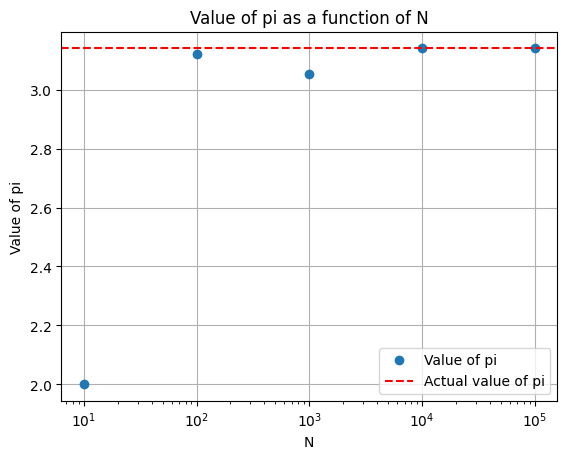

In [58]:
def pi_plot():
    '''
    () -> None
    This function plots the value of pi as a function of N using the area of a quarter circle found using monte-carlo integration by rejection.
    Preconditions: None
    '''
    # Define the values of N and the value of pi
    N = [10, 100, 1000, 10000, 100000]
    y = [4 * monte_carlo_rejection_integration(quarter_arc, 0, R, i) / R**2 for i in N]
    
    # Plot the values of pi as a function of N on a log scale
    plt.figure(1)
    plt.semilogx(N, y, 'o', label='Value of pi')
    # Plot the actual value of pi
    plt.axhline(y=np.pi, color='r', linestyle='--', label='Actual value of pi')
    # Label the axes and title the plot
    plt.xlabel('N')
    plt.ylabel('Value of pi')
    plt.title('Value of pi as a function of N')
    plt.legend()
    plt.grid()
    plt.show()

pi_plot()

### h)

As is to be expected, the accuracy of the monte-carlo method increases with a greater number of test points (N). However, though the accuracy may increase, it is not always precise. If multiple trials of the graph were to be run, the accuracy of the monte-carlo method would be more apparent; each graph would look very different from the last. This is due to the random nature of the monte-carlo method. The more test points, the more accurate the graph will be, but it will never be perfect.